# Problema 2

Primeiramente, vamos encontrar a solução analítica:

In [2]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

In [16]:
# Define the variables
x = sp.symbols('x')
y = sp.Function('y')(x)

# Define the differential equation
diff_eq = sp.Eq(sp.diff(y, x), sp.cos(x))

# Solve the differential equation
solution = sp.dsolve(diff_eq, y, ics={y.subs(x, 0): 1})
y_exact_fun = lambda t: solution.rhs.evalf(20, subs={x: t})

# Print the solution
solution

Eq(y(x), sin(x) + 1)

Método de solução numérico:

In [17]:
def forward_euler_approx(function, h, elapsed_time=10, y0=0, t0=0,):
    N = int(elapsed_time/h)
    y = np.zeros(N+1)
    t = np.zeros(N+1)
    t[0] = t0
    y[0] = y0
    
    for i in range(0, N):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h*function(t[i])
    return y,t

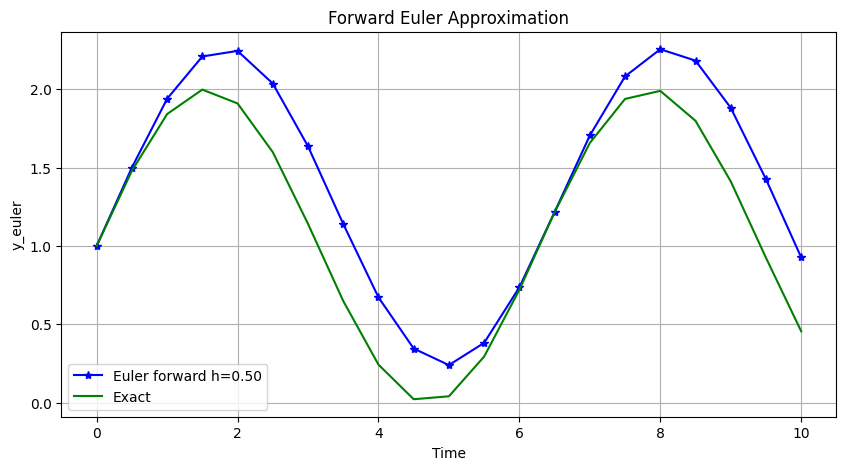

In [20]:
function = lambda t: math.cos(t) 

h1 = 0.5
h2 = 0.08

plt.figure(figsize=(10, 5))
y_euler, time = forward_euler_approx(function, h1, y0=1, t0=0)
plt.plot(time, y_euler, 'b-*', label=f'Euler forward h={h1:.2f}')
#y_euler, time = forward_euler_approx(function, h2, 1, 0)
#plt.plot(time, y_euler, 'r-*', label=f'Euler forward h={h2:.3f}')

y_exact = [y_exact_fun(t) for t in time]
plt.plot(time, y_exact, '-g', label='Exact')
plt.xlabel('Time')
plt.ylabel('y_euler')
plt.title('Forward Euler Approximation')
plt.legend()
plt.grid(True)
plt.show()